In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("air_quality_ass4.csv", encoding="latin1")

print(df.head())
print(df.columns)


  stn_code       sampling_date           state   location agency  \
0    150.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
1    151.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
2    152.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
3    150.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   
4    151.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   

                                 type  so2   no2  rspm  spm  \
0  Residential, Rural and other Areas  4.8  17.4   NaN  NaN   
1                     Industrial Area  3.1   7.0   NaN  NaN   
2  Residential, Rural and other Areas  6.2  28.5   NaN  NaN   
3  Residential, Rural and other Areas  6.3  14.7   NaN  NaN   
4                     Industrial Area  4.7   7.5   NaN  NaN   

  location_monitoring_station  pm2_5        date  
0                         NaN    NaN  1990-02-01  
1                         NaN    NaN  1990-02-01  
2                         NaN    NaN  1990-02-01  
3       

/var/folders/ht/wjf99nq17qddpvdq71v9c27m0000gn/T/ipykernel_8871/2879271743.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("air_quality_ass4.csv", encoding="latin1")


In [5]:
x = df["no2"].dropna().values
print(x[:10])


[17.4  7.  28.5 14.7  7.5 25.7 17.1  8.7 23.   8.9]


In [8]:
# Replace with your actual university roll number
r = 102317094

a_r = 0.5 * (r % 7)
b_r = 0.3 * ((r % 5) + 1)

print("a_r =", a_r)
print("b_r =", b_r)


a_r = 2.5
b_r = 1.5


In [9]:
z = x + a_r * np.sin(b_r * x)
print(z[:10])


[19.4583325   4.8007606  26.14186473 14.55295635  5.08048001 27.57966569
 18.33624846  9.86248843 23.1437187  10.6646374 ]


In [11]:
import torch
print(torch.__version__)


2.8.0


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim


In [13]:
z_tensor = torch.tensor(z, dtype=torch.float32).view(-1, 1)


In [14]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.net(x)


In [15]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)


In [16]:
G = Generator()
D = Discriminator()

criterion = nn.BCELoss()

optimizer_G = optim.Adam(G.parameters(), lr=0.001)
optimizer_D = optim.Adam(D.parameters(), lr=0.001)


In [19]:
epochs = 2000
batch_size = 64


In [ ]:
for epoch in range(epochs):

   
    optimizer_D.zero_grad()

    # Real samples
    idx = torch.randint(0, z_tensor.size(0), (batch_size,))
    real_samples = z_tensor[idx]
    real_labels = torch.ones(batch_size, 1)

    real_output = D(real_samples)
    loss_real = criterion(real_output, real_labels)

    # Fake samples
    noise = torch.randn(batch_size, 1)
    fake_samples = G(noise)
    fake_labels = torch.zeros(batch_size, 1)

    fake_output = D(fake_samples.detach())
    loss_fake = criterion(fake_output, fake_labels)

    # Total discriminator loss
    loss_D = loss_real + loss_fake
    loss_D.backward()
    optimizer_D.step()

    optimizer_G.zero_grad()

    noise = torch.randn(batch_size, 1)
    fake_samples = G(noise)
    fake_output = D(fake_samples)

    loss_G = criterion(fake_output, real_labels)

    loss_G.backward()
    optimizer_G.step()

    # Print occasionally
    if epoch % 400 == 0:
        print(f"Epoch {epoch} | Loss D: {loss_D.item():.4f} | Loss G: {loss_G.item():.4f}")


Epoch 0 | Loss D: 1.3861 | Loss G: 0.6622
Epoch 400 | Loss D: 1.3965 | Loss G: 0.7241
Epoch 800 | Loss D: 1.3864 | Loss G: 0.6846
Epoch 1200 | Loss D: 1.3905 | Loss G: 0.5881
Epoch 1600 | Loss D: 1.3862 | Loss G: 0.7235


In [ ]:
# fake samples from trained generator
num_samples = 10000

noise = torch.randn(num_samples, 1)
z_fake = G(noise).detach().numpy()


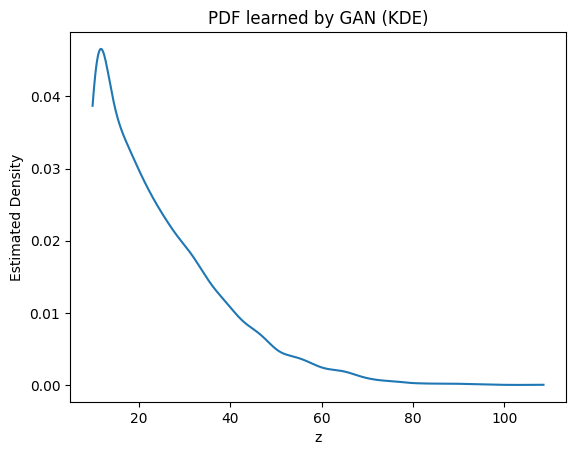

In [25]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(z_fake.flatten())

z_vals = np.linspace(z_fake.min(), z_fake.max(), 1000)
pdf_vals = kde(z_vals)

plt.plot(z_vals, pdf_vals)
plt.xlabel("z")
plt.ylabel("Estimated Density")
plt.title("PDF learned by GAN (KDE)")
plt.savefig("gan_pdf_kde.png", dpi=300, bbox_inches="tight")
plt.show()
